In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as inter

puntos=[]
puntos_x=[]
puntos_y=[]

#Por medio de clics se obtienen los puntos 
def dibujando(event,x,y,flags,param):
    if event==cv2.EVENT_LBUTTONDOWN:
        cv2.circle(imagen,(x,y),5,(255,0,0),-1)
        punto=(x,y)
        puntos.append(punto)
        puntos_x.append(x)
        puntos_y.append(y)
        #print("-----")
        #print("x=",x)
        #print("y=",y)
    if event==cv2.EVENT_RBUTTONDBLCLK:
        print(puntos)
        
imagen=cv2.imread("C:\\Users\\alega\\Downloads\\poo.jpg")
cv2.namedWindow("Imagen")
cv2.setMouseCallback("Imagen",dibujando)

while True:
    cv2.imshow("Imagen",imagen)
    
    k=cv2.waitKey(1) & 0xFF
    if k==27:
        break 
cv2.destroyAllWindows
print(puntos)



[(139, 44), (117, 39), (87, 38), (68, 29), (42, 35), (54, 65), (50, 87), (40, 113), (30, 154), (71, 188), (149, 196), (188, 155), (178, 111), (166, 68), (183, 43), (163, 20)]


Área de la región D: 26374.254982102168
Longitud de la frontera: 736.2190379030628


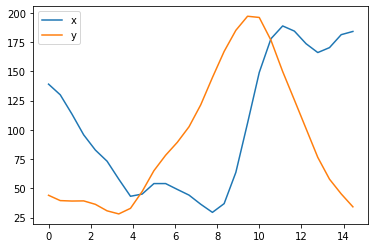

In [2]:
just=len(puntos)
num=np.arange(just)

#Construcción de los splines 
splinex=inter.make_interp_spline(num,puntos_x)
spliney=inter.make_interp_spline(num,puntos_y)
li=np.arange(min(num), max(num), (max(num)-min(num))/k).tolist()
plt.plot(li,splinex(li), label='x')
plt.plot(li,spliney(li), label='y')
plt.legend()

#Calcular el área 
t_fino = np.linspace(0, len(puntos_x), 1000)
area = 0.5 * np.sum(splinex(t_fino[:-1]) * np.diff(spliney(t_fino)) - spliney(t_fino[:-1]) * np.diff(splinex(t_fino)))

# Calcular la longitud de la frontera
longitud = np.sum(np.sqrt(np.diff(splinex(t_fino))**2 + np.diff(spliney(t_fino))**2))

print("Área de la región D:", np.abs(area))
print("Longitud de la frontera:", longitud)
